# **Analysis of the Mental Health in the Tech Industry**

## **Introduction**

This data is from Open Source Mental Illness (OSMI) using survey data from 
years 2014, 2016, 2017, 2018 and 2019. 

It measures and attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## **Goal**

"To examine the prevalence and impacts of poor mental health in the tech industry, to provide employers with suggestions on how to help their employees be more vocal about mental health problems. The insights and understanding gained from this analysis will be used to inform the development of strategies and interventions to promote mental health and well-being in the tech industry, and to support the implementation of these interventions in order to improve mental health outcomes among tech workers."

## **Objectives** 

Work with SQLite datasets;

Perform EDA;

Visualize data with Matplotlib & Seaborn;

Read data, perform queries and filter data using SQL and Pandas

## **Data**

The data is extracted from the kaggle [mental health analysis ](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry)

## **About the database**

The SQLite database contains 3 tables. Survey, Question, and Answer.

Survey (PRIMARY KEY INT SurveyID, TEXT Description)

Question (PRIMARY KEY QuestionID, TEXT QuestionText)

Answer (PRIMARY/FOREIGN KEY SurveyID, PRIMARY KEY 
UserID, PRIMARY/FOREIGN KEY QuestionID, TEXT AnswerText)

## **Loading and importing Data**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [2]:
# pip install matplotlib --upgrade

In [3]:
# Create a connection to the database

con = sqlite3.connect("mental_health.sqlite")

**Extracting all the Tables in the Database**

**Table:Questions**

In [4]:
pd.read_sql_query("SELECT * FROM question", con)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [5]:
questions = pd.read_sql_query("SELECT * FROM Question", con)
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [6]:
print(f"The records are {questions.shape} in the questions table")

The records are (105, 2) in the questions table


**Findings:**

Table Questions has 105 rows and 2 features

**Table:Answers**

In [7]:
answers = pd.read_sql_query("SELECT * FROM answer", con)
answers

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [8]:
print(f"The records are {answers.shape} in the answers table")

The records are (236898, 4) in the answers table


**Findings:**

The participations had a good rate and nealry 93000 observations were recorded

**Table:Survey**

In [9]:
survey = pd.read_sql_query("SELECT * FROM survey", con)
survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


**Findings:**

The survey was collected for 5 years from 2014-2019(2015 is missing it may affect the analysis)

## **Transforming the Data**



**Finding Missing vlaues**

In [10]:
missing_answers = answers.isnull().sum()
print(f"The missing values in the answers:\n\n{missing_answers}")

The missing values in the answers:

AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64


**Findings**

There are no missing values in the answers table


In [11]:
missing_questions = questions.isnull().sum()
print(f"The missing values in the answers:\n\n{missing_questions}")

The missing values in the answers:

questiontext    0
questionid      0
dtype: int64


**Findings**

There are no missing values in the questions table

In [12]:
missing_survey = survey.isnull().sum()
print(f"The missing values in the answers:\n\n{missing_survey}")

The missing values in the answers:

SurveyID       0
Description    0
dtype: int64


**Findings**

There are no missing values in the questions table

### How many did people join the survey by year?

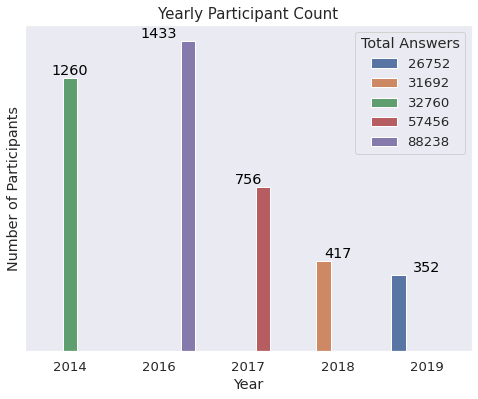

In [13]:
def execute_select(query):
    return pd.read_sql(query, con)


# Execute the SELECT statement
query = """
          SELECT (SurveyID)  Year,
          COUNT(DISTINCT QuestionID)  Total_questions,
          COUNT(DISTINCT UserID) Participants,
          COUNT(*) Total_answers
          FROM Answer
          GROUP BY SurveyID
          ORDER BY SurveyID
"""
results = execute_select(query)

# Set the style and font scale
sns.set(style="darkgrid", palette="deep", font_scale=1.2)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar chart
ax = sns.barplot(data=results, x="Year", y="Participants", hue="Total_answers")

# Add a title and labels
plt.title("Yearly Participant Count", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Participants")

# Remove the y ticks
plt.yticks([])

# Add a legend
plt.legend(title="Total Answers", loc="upper right")

# Add labels to the bars
for i, v in enumerate(results["Participants"]):
    ax.text(i, v, str(v), color="black", va="bottom", ha="center")

# Show the plot
plt.show()

#### Findings:

The most respondents count of the survey is on 2016, and then the numbers went down year by year.



### Total Participants 

In [14]:
pd.DataFrame(results[["Participants", "Total_answers"]].sum(), columns=["Sum"]).reset_index()

,index,Sum
0,Participants,4218
1,Total_answers,236898


#### Findings:

There are total 4218 number of participants

### Returning Participants

In [15]:
query = """SELECT UserID as ReturningParticipants, COUNT(*) As Returns
           FROM (SELECT SurveyID, UserID
           FROM Answer
           GROUP BY 1,2 ) ParticipantsByYear
           GROUP BY 1
           HAVING COUNT(UserID) > 1
           
        """
# Execute the query and store the results in a dataframe
returning_Participants = pd.read_sql(query, con)


print(
    f"There were {returning_Participants['ReturningParticipants'].count()} returning respondents."
)

There were 0 returning respondents.


#### Findings:

After pooling together we can see that there are no partipants are returing to the surveys

### About Survey Questions 

#### No.of survey question

In [16]:
query = "select * from question"

pd.read_sql(query, con)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [17]:
query = "select * from answer"

pd.read_sql(query, con)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [18]:
query = """
        SELECT DISTINCT questionid, questiontext
        FROM Question
        """
questions = pd.read_sql(query, con)
print(f"There are {questions.shape[0]} questions in the table")

There are 105 questions in the table


#### Findings:
    There are Total 105 questions were asked 

#### Questions Count Per Year

In [19]:
query = """
        SELECT (SurveyID) Year, COUNT ( DISTINCT QuestionID) QuestionCount
        FROM Answer 
        GROUP BY 1
        ORDER BY 1 
        """
questions_year = pd.read_sql(query, con)
questions_year

,Year,QuestionCount
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


#### Findings:
    We can from 2017-2019 the question count is same, seems like they repeat the same questions for these years!! let's find out

### Identical Questions

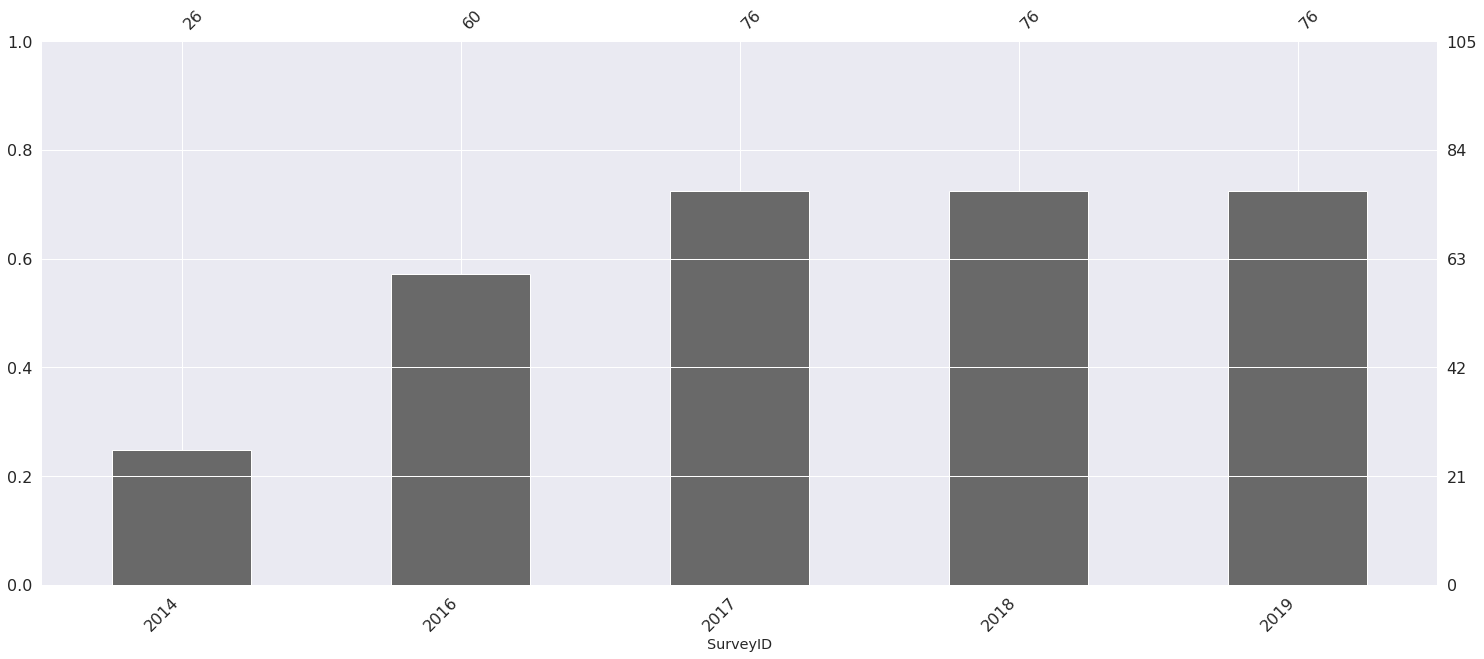

In [20]:
query = """ 
        SELECT A.SurveyID, A.QuestionID, Q.questiontext AS QuestionText
        FROM Question  Q
        JOIN Answer A
        ON Q.QuestionID=A.QuestionID
        GROUP BY 1,2
        ORDER BY 1,2
        """
pivot_data = pd.read_sql(query, con)
# Create a pivot table
pivot_table = pd.pivot(
    pivot_data, columns="SurveyID", index="QuestionID", values="QuestionText"
)


# Create the matrix chart
msno.bar(pivot_table)
# Show the plot
plt.show()

#### Findings:
The data from  2017 is  identical, but 2014 and 2016 has noticible different questions

### Data Merging

In [21]:
df = pd.read_sql_query(
    """SELECT a.SurveyId AS year,
                             q.questionid,q.questiontext Question,
                             a.AnswerText Answer,
                             a.UserID 
                             FROM Answer a
                             JOIN Question q
                             ON a.QuestionID = q.questionid;""",
    con,
)

df.head()

,year,questionid,Question,Answer,UserID
0,2014,1,What is your age?,37,1
1,2014,1,What is your age?,44,2
2,2014,1,What is your age?,32,3
3,2014,1,What is your age?,31,4
4,2014,1,What is your age?,31,5


### Counting_Unique_Questions

In [22]:
def count_unique_questions(df):
    unique_questions = df.groupby(["year", "Question"]).agg(unique=("Question", "nunique"))
    unique_questions.reset_index(inplace=True)
    return unique_questions


count = count_unique_questions(df)
count

,year,Question,unique
0,2014,Any additional notes or comments,1
1,2014,Are you self-employed?,1
2,2014,Do you feel that your employer takes mental he...,1
3,2014,Do you have a family history of mental illness?,1
4,2014,Do you know the options for mental health care...,1
...,...,...,...
309,2019,Would you feel comfortable discussing a mental...,1
310,2019,Would you feel comfortable discussing a mental...,1
311,2019,Would you feel more comfortable talking to you...,1
312,2019,Would you have been willing to discuss your me...,1


#### Findings:
We can see all the unique and not repeated ones in over the survey years

### Repeated Questions

In [23]:
counts = (
    (count["Question"].value_counts())
    .to_frame()
    .rename(columns={"Question": "Repeated_Questions"})
)
counts.sample(5)

,Repeated_Questions
Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,3
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,1
Do you feel that being identified as a person with a mental health issue would hurt your career?,1
"If you have a mental health condition, do you feel that it interferes with your work?",1
What country do you live in?,5


In [24]:
repeated_questions = counts[(counts["Repeated_Questions"] == 4)]
print(repeated_questions)

                                                    Repeated_Questions
If you have been diagnosed or treated for a men...                   4
If you have been diagnosed or treated for a men...                   4
If you have a mental health disorder, how often...                   4
Do you know the options for mental health care ...                   4
Do you know local or online resources to seek h...                   4
Do you have previous employers?                                      4
Do you have medical coverage (private insurance...                   4
Does your employer offer resources to learn mor...                   4
Do you currently have a mental health disorder?                      4
Has your employer ever formally discussed menta...                   4
Have you ever been diagnosed with a mental heal...                   4
Have you had a mental health disorder in the past?                   4
If you have a mental health disorder, how often...                   4
Have y

In [25]:
print(f"{len(repeated_questions)} questions were repeated in surveys overs the years")

31 questions were repeated in surveys overs the years


#### Findings:
    31 questions were reteadly asked on evey year, and covered wide range of topics included mental health.

### Repeating questions by Year

In [26]:
# Create an empty list to store the results
results = []

# Iterate over the years
for year in df["year"].unique():
    # Select the rows where the year is equal to the current year
    df_year = df[df["year"] == year]

    # Compute the sum of duplicated values in the "Question" column
    b = repeated_questions.duplicated().sum()

    # Convert the sum to a Series
    b = pd.Series(b)

    # Create a Series indicating the year
    a = pd.Series([year])

    # Concatenate the b and a Series vertically (i.e., row-wise)
    result = pd.concat([b, a], axis=0)

    # Add the result to the list
    results.append(result)

# Concatenate all the results horizontally (i.e., column-wise)
result = pd.concat(results, axis=1)
result

,0,1,2,3,4
0,30,30,30,30,30
0,2014,2016,2017,2018,2019


#### Findings:

Mostly 30 questions were repeated on each year's survey

### Gender and Age Groups of the Respondents of the Survey



In [27]:
query = """
        SELECT
            MIN(CAST(AnswerText AS int)) AS MinAge, 
            MAX(CAST(AnswerText AS int)) AS MaxAge
        FROM Answer
        WHERE QuestionID = 1
        """
AgeRange = pd.read_sql(query, con)
AgeRange

,MinAge,MaxAge
0,-29,329


#### Findings:
    Since the respondents of survey are employees of Tech Workplace, age as -1 or 329 are not the expected answer. So we can take this age range will be manually selected from 18 to 80:

In [28]:
query = """
WITH UserAge AS (
    SELECT UserID, CAST(AnswerText AS int) As Age
    FROM Answer
    WHERE QuestionID = 1 AND Age >= 18 AND Age <= 70
)
SELECT 
    CASE
        WHEN Age <= 25 THEN "18-25"
        WHEN Age BETWEEN 26 AND 30 THEN "26-30"
        WHEN Age BETWEEN 31 AND 35 THEN "31-35"
        WHEN Age BETWEEN 36 AND 40 THEN "36-40"
        WHEN Age BETWEEN 41 AND 45 THEN "41-45"
        WHEN Age BETWEEN 46 AND 50 THEN "46-50"
        WHEN Age BETWEEN 51 AND 55 THEN "51-55"
        WHEN Age BETWEEN 56 AND 60 THEN "56-60"
        WHEN Age BETWEEN 61 AND 65 THEN "61-65"
        WHEN Age BETWEEN 66 AND 70 THEN "66-70"
    END AS AgeGroup,
    COUNT(DISTINCT UserID) AS Count
FROM UserAge
GROUP BY AgeGroup

"""

AgeRange = pd.read_sql(query, con)


fig = px.bar(
    AgeRange, x="AgeGroup", y="Count", text="Count", title="Participants Age Group Analysis"
)
fig.update_traces(textposition="outside")
fig.show()

#### Findings:
Most respondents'ages are in the range of 26-40. Both 26-30 and 31-35 groups have over 1000 respondents. This age distribution is sknew right, since they work in tech workplace, this distribution is acceptable.

In [29]:
query = """WITH UserGender AS (
    SELECT 
        UserID, 
        UPPER(AnswerText) AS AnswerText
    FROM Answer
    WHERE QuestionID = 2
)
SELECT 
    GenderTag, 
    COUNT(DISTINCT UserID) AS Cnt
FROM (
    SELECT 
        UserID, 
        CASE 
            WHEN AnswerText LIKE '%AGENDER%' THEN 'Agender'
            WHEN AnswerText LIKE '%FLU%' OR AnswerText LIKE '%BI%' OR AnswerText LIKE '%QUEER%' THEN 'Non-Binary/Genderfluid/Queer'
            WHEN AnswerText LIKE '%TRANS%' THEN 'Trans'
            WHEN AnswerText LIKE '%FEM%' OR AnswerText LIKE '%WOMAN%' THEN 'Female'
            WHEN AnswerText LIKE '%MALE%' OR AnswerText LIKE '%MASCUL%' THEN 'Male'
            ELSE 'Other'
        END AS GenderTag
    FROM UserGender
) 
GROUP BY GenderTag


        """
Gender_df = pd.read_sql(query, con)

fig = px.pie(
    Gender_df, values="Cnt", names="GenderTag", title="Respondents Gender Group Analysis"
)
fig.show()

#### Findings:
    The gender distribution of respondents is somewhat unfair. There are about three times as many male as female. However, consider the stereotype of the Tech Workplace, the gap in male and female respondents is also acceptable.In conclution, the profile the respondents are more like males between 26-40
    


### Working and Living of ParticipantS Countries

In [30]:
question_column = "questionid"
answer_column = "Answer"

# Filter dataframe by questionid 3
country_data = df[df[question_column] == 3].copy()

# Drop unnecessary columns
country_data.drop(columns=[question_column, "Question"], inplace=True)

# Rename columns
country_data.rename(columns={answer_column: "country"}, inplace=True)

# Count number of occurrences of each country
freq_country = (
    country_data.groupby("country")
    .agg(count=("country", "count"))
    .sort_values("count", ascending=False)
)


# Filter dataframe by questionid 50
workcountry_data = df[df[question_column] == 50].copy()

# Drop unnecessary columns
workcountry_data.drop(columns=[question_column, "Question"], inplace=True)

# Rename columns
workcountry_data.rename(columns={answer_column: "country"}, inplace=True)

# Count number of occurrences of each country
freq_workcountry = (
    workcountry_data.groupby("country")
    .agg(count=("country", "count"))
    .sort_values("count", ascending=False)
)

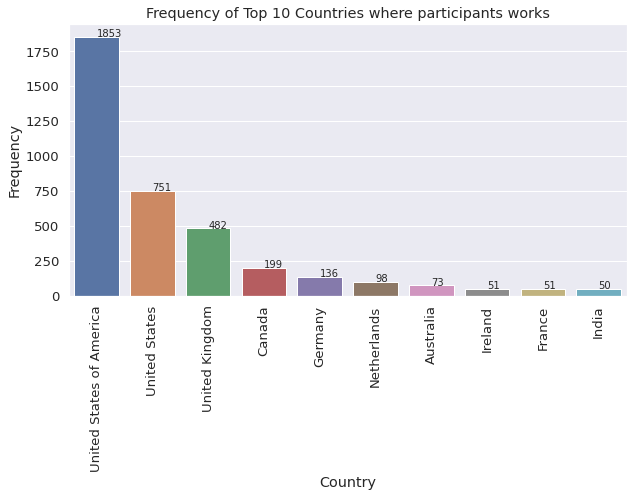

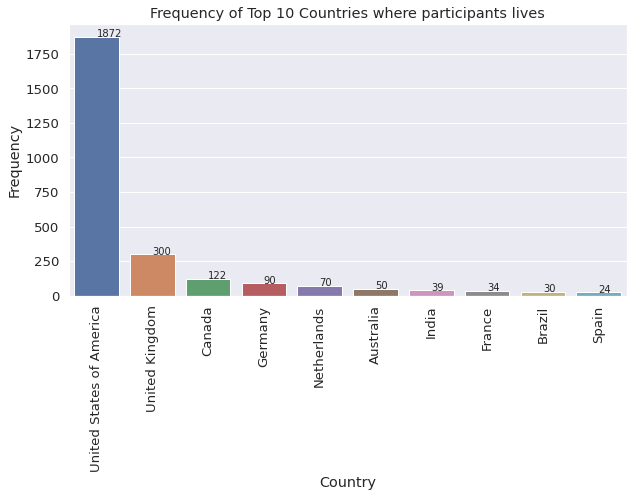

In [31]:
# Plot the frequency of top 10 countries for question 3
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=freq_country.head(10).reset_index(), x="country", y="count")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of Top 10 Countries where participants works")
plt.xticks(rotation=90)
# adding values on each bar
for i in range(10):
    ax.text(x=i, y=freq_country.iloc[i, 0], s=freq_country.iloc[i, 0], size=10)

plt.show()


# Plot the frequency of top 10 countries for question 50
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=freq_workcountry.head(10).reset_index(), x="country", y="count")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of Top 10 Countries where participants lives")
plt.xticks(rotation=90)
# adding values on each bar
for i in range(10):
    ax.text(x=i, y=freq_workcountry.iloc[i, 0], s=freq_workcountry.iloc[i, 0], size=10)
plt.show()

#### Findings:

It may be seen that data is very similar for both cases, meaning that participants of survey usualy work and live in the same country.

### Participants working in IT

In [32]:
# Filter the rows of the DataFrame where questionid is equal to 9
company_data = df[(df["questionid"] == 9)]

# Change the data type of Answer column to int
company_data["Answer"] = company_data["Answer"].astype(int)

# Replace values -1, 0, 1 with 'Neutral', 'No', 'Yes' respectively
company_data["Answer"] = company_data["Answer"].replace({-1: "Neutral", 0: "No", 1: "Yes"})

# Group the data by Answer column and create a new column 'count' that contains the count of occurrences of each unique Answer value
company_data = company_data.groupby("Answer").agg(count=("Answer", "count"))


company_data

,count
Answer,
Neutral,504
No,826
Yes,2888


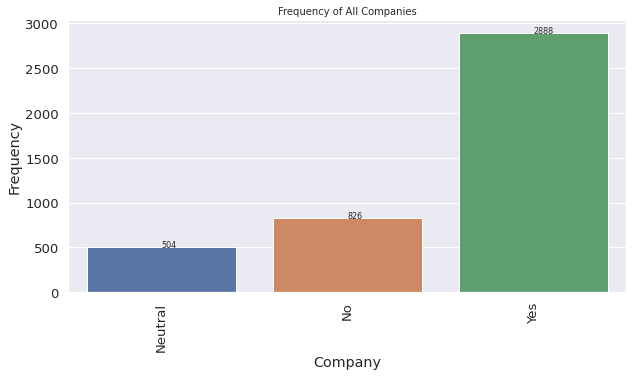

In [33]:
# Plot the frequency of all company names
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=company_data.index, y=company_data["count"])
plt.xlabel("Company")
plt.ylabel("Frequency")
plt.title("Frequency of All Companies", size=10)
plt.xticks(rotation=90)

# adding value on each bar
for i in range(len(company_data)):
    ax.text(x=i, y=company_data.iloc[i, 0], s=company_data.iloc[i, 0], size=8)

plt.show()

#### Findings:

Many of the survey participants reported being employed in the technology industry, however, a significant portion indicated that they do not work in this field. This could be due to the growing integration of technology in various industries, leading to the development of IT departments in companies outside of the tech sector.

### No.Of Employees working

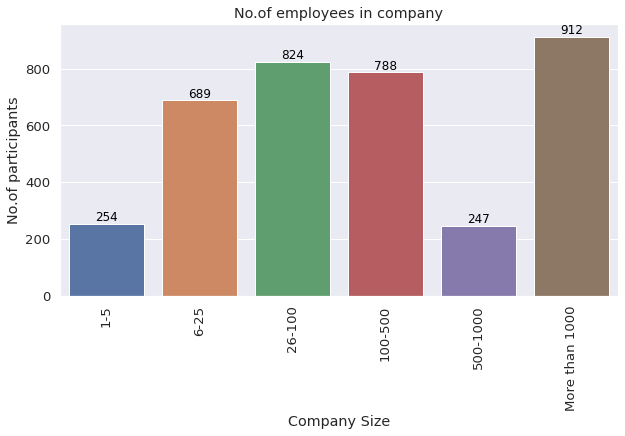

In [34]:
def bar_values_annotate(ax):
    for p in ax.patches:
        if np.isnan(p.get_height()):
            continue
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2, p.get_height() + 10),
            ha="center",
            fontsize=12,
            color="black",
        )


company_size_data = df[df["questionid"] == 8].groupby("Answer").agg(count=("Answer", "count"))
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=company_size_data.index,
    y=company_size_data["count"],
    order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
)
plt.xlabel("Company Size")
plt.ylabel("No.of participants")
plt.title("No.of employees in company")
plt.xticks(rotation=90)
bar_values_annotate(ax)
plt.show()

#### Findings:
    It may be seen that companies of large and average size dominate in the tech industry.

### Mental Health Analysis

In [35]:
df

,year,questionid,Question,Answer,UserID
0,2014,1,What is your age?,37,1
1,2014,1,What is your age?,44,2
2,2014,1,What is your age?,32,3
3,2014,1,What is your age?,31,4
4,2014,1,What is your age?,31,5
...,...,...,...,...,...
236893,2016,117,Which of the following best describes your wor...,Other,2689
236894,2016,117,Which of the following best describes your wor...,Support,2690
236895,2016,117,Which of the following best describes your wor...,Back-end Developer,2691
236896,2016,117,Which of the following best describes your wor...,DevOps/SysAdmin,2692


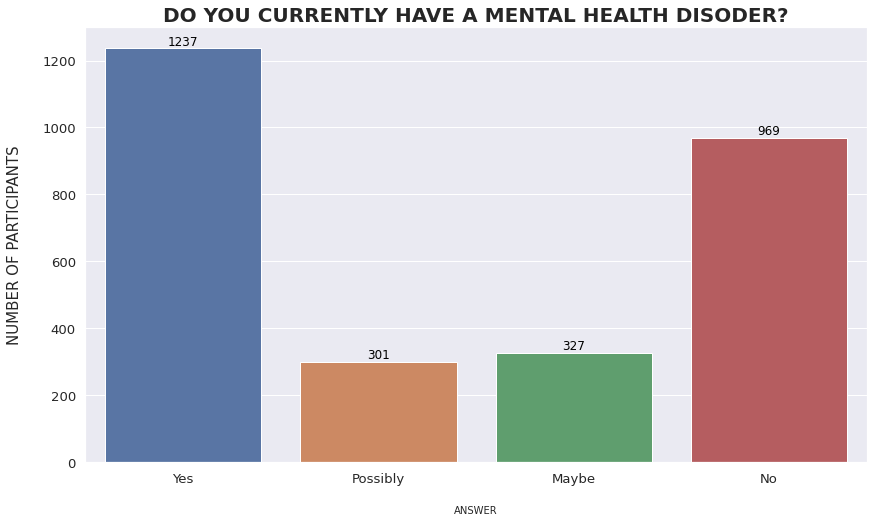

In [36]:
q33_data = df[df["questionid"] == 33].drop(columns=["year"])
q33_data_agg = q33_data.groupby("Answer").agg(count=("Answer", "count"))

order = ["Yes", "Possibly", "Maybe", "No"]

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=q33_data_agg.index, y=q33_data_agg["count"], order=order)
plt.xlabel("ANSWER", size=10, labelpad=20)
plt.ylabel("NUMBER OF PARTICIPANTS", size=15, labelpad=20)
plt.title("DO YOU CURRENTLY HAVE A MENTAL HEALTH DISODER?", size=20, weight="bold")
bar_values_annotate(ax)

### Family History of Mental Illness

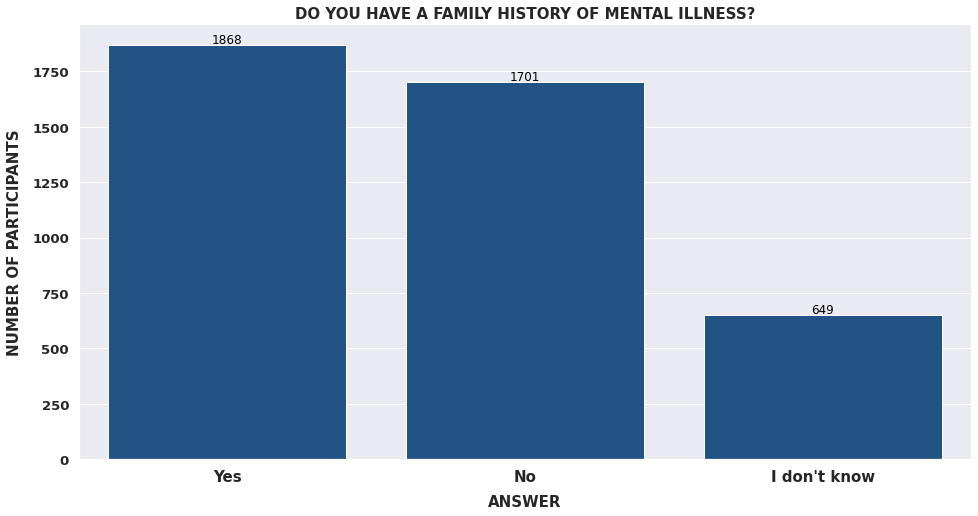

In [37]:
# getiing data about family history of mental disorders from question 6 answers
q6_data = (
    df[df["questionid"] == 6]
    .drop(columns=["questionid", "Question", "year"])
    .groupby("Answer")
    .agg(count=("Answer", "count"))
)

fig, ax = plt.subplots(figsize=(16, 8))

order = ["Yes", "No", "I don't know"]

sns.barplot(x=q6_data.index, y=q6_data["count"], color="#115396", order=order)
plt.xlabel("ANSWER", size=15, labelpad=10, fontweight="bold")
plt.ylabel("NUMBER OF PARTICIPANTS", size=15, labelpad=10, fontweight="bold")
plt.title("DO YOU HAVE A FAMILY HISTORY OF MENTAL ILLNESS?", size=15, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold", fontsize=15)
bar_values_annotate(ax)

#### Findings:
    A majority of those surveyed who reported mental health issues also had a family history of mental illness. This suggests that genetics and upbringing may play a role in the development of mental disorders, in addition to potential workplace stressors. However, it is important to note that there may be other factors at play as well.

In [38]:
# preparing age data set from question 1 answers
age_data = df[df["questionid"] == 1]
age_data = age_data.drop(columns=["questionid", "Question"])
age_data.rename(columns={"Answer": "age"}, inplace=True)

# dropping false values
age_data = age_data[age_data["age"] != "No"]

# changing data type
age_data["age"] = age_data["age"].astype("int64")

age_data.head()

,year,age,UserID
0,2014,37,1
1,2014,44,2
2,2014,32,3
3,2014,31,4
4,2014,31,5


### Age Distribution Of Mental Health Participants

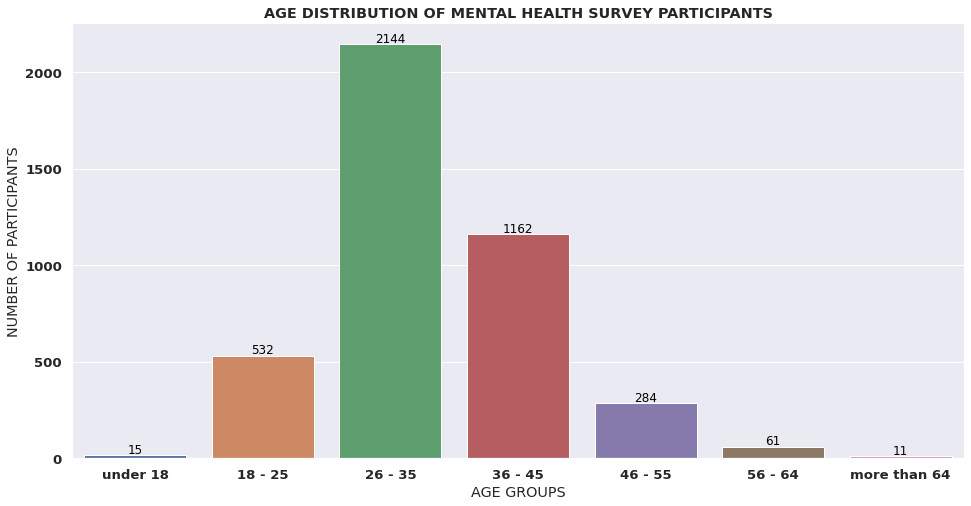

In [39]:
# prepare the dataframe for question 1
age_data = df[df["questionid"] == 1]
age_data = age_data.drop(columns=["questionid", "Question"])
age_data = age_data[age_data["Answer"] != "No"]
age_data["age"] = age_data["Answer"].astype("int64")
age_data = age_data.drop(columns=["Answer"])

# define age groups
age_bins = [0, 18, 25, 35, 45, 55, 64, 100]
age_labels = ["under 18", "18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 64", "more than 64"]
age_data["age_groups"] = pd.cut(age_data["age"], bins=age_bins, labels=age_labels)

# group by and count the number of participants in each age group
grouped_age = age_data.groupby("age_groups").agg(count=("age_groups", "count"))

# plot the results using seaborn
# define the figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# plot the bar chart using seaborn
sns.barplot(x=grouped_age.index, y=grouped_age["count"])

# add x and y labels
plt.xlabel("AGE GROUPS")
plt.ylabel("NUMBER OF PARTICIPANTS")
plt.title("AGE DISTRIBUTION OF MENTAL HEALTH SURVEY PARTICIPANTS", weight="bold")

# add y ticks
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
# add the values on top of each bar
bar_values_annotate(ax)

### Findings:
We can see that age 26-35 particpiants are actively participated in the survey

### Major Age Group Affected 

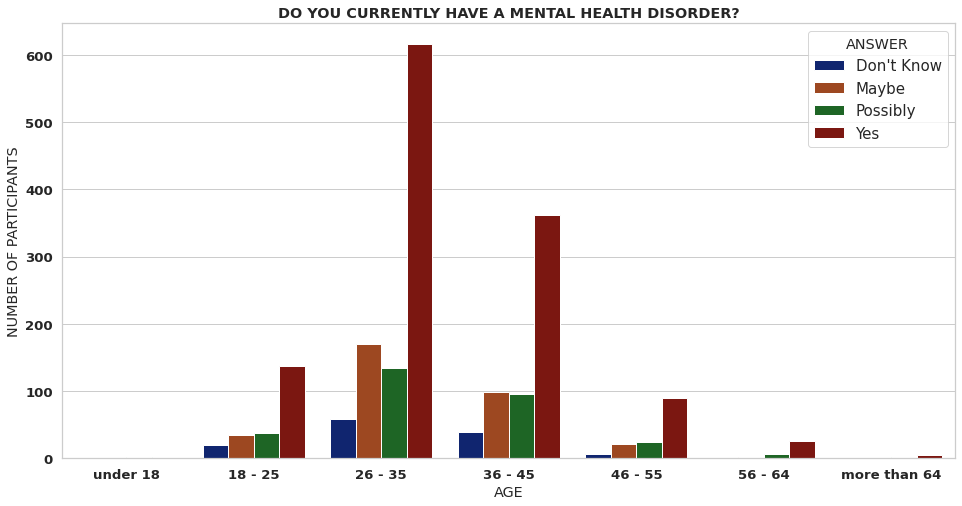

In [40]:
# define age groups
age_bins = [0, 18, 25, 35, 45, 55, 64, 100]
age_labels = ["under 18", "18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 64", "more than 64"]
age_data["age_groups"] = pd.cut(age_data["age"], bins=age_bins, labels=age_labels)

# prepare the dataframe for question 33
q33_data = df[df["questionid"] == 33]
q33_data = q33_data[q33_data["Answer"] != "No"]
q33_data = q33_data.rename(columns={"Answer": "q33_ans"})

# merge the two dataframes
q33_age_data = pd.merge(q33_data, age_data, on="UserID", how="inner")

# group by and count the number of participants for each answer in each age group
q33_age_agg = q33_age_data.groupby(["q33_ans", "age_groups"]).agg(count=("q33_ans", "count"))
q33_age_agg = q33_age_agg.reset_index()

# plot the results using seaborn
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.barplot(
    x="age_groups", y="count", hue="q33_ans", data=q33_age_agg, order=age_labels, palette="dark"
)
plt.xlabel("AGE")
plt.ylabel("NUMBER OF PARTICIPANTS")
plt.title("DO YOU CURRENTLY HAVE A MENTAL HEALTH DISORDER?", weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
plt.legend(loc="upper right", title="ANSWER", fontsize=15)

# Show the plot
plt.show()

#### Findings:
    Mental health issues are prevalent across all age groups, with more individuals reporting mental illness than those with good mental health. The numbers appear to be proportionate to the size of each age group, so it is not accurate to say that any specific age group is more affected by mental health problems

### Mental Health Status of Survey Participants

In [41]:
query = """SELECT 
   (CASE 
       WHEN QuestionID = 32 THEN "Had in Past"
       WHEN QuestionID = 33 THEN "Currently Have"
       WHEN QuestionID = 34 THEN "Been Diagnosed"
   END) AS Status,
   (CASE 
       WHEN AnswerText = "Yes" THEN "Yes"
       WHEN AnswerText = "No" THEN "No"
       ELSE "Not Sure"
   END) AS Result,
   COUNT(DISTINCT UserID) as Count
FROM Answer
WHERE QuestionID IN (32, 33, 34)
GROUP BY Status, Result
"""

MentalHealth = pd.read_sql(query, con)
MentalHealth

,Status,Result,Count
0,Been Diagnosed,No,732
1,Been Diagnosed,Not Sure,863
2,Been Diagnosed,Yes,1363
3,Currently Have,No,969
4,Currently Have,Not Sure,752
5,Currently Have,Yes,1237
6,Had in Past,No,896
7,Had in Past,Not Sure,645
8,Had in Past,Yes,1417


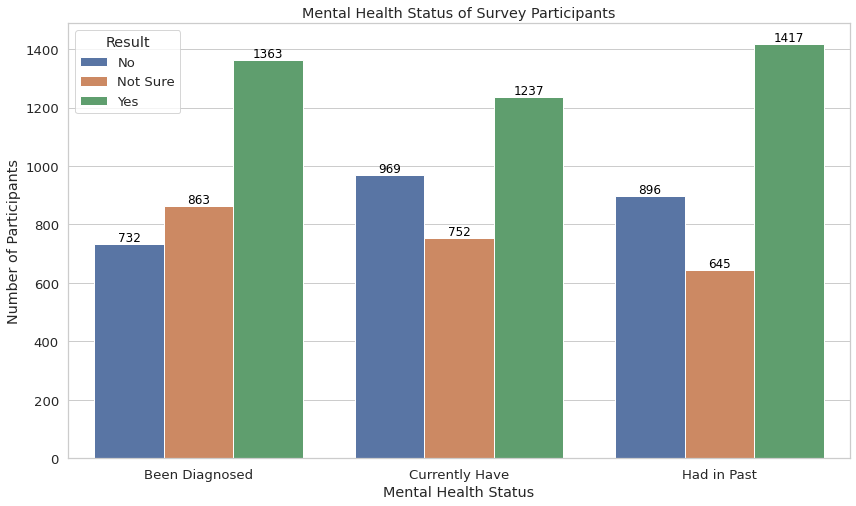

In [42]:
# Creating the bar plot
fig = plt.figure(figsize=(14, 8))
ax = sns.barplot(x="Status", y="Count", hue="Result", data=MentalHealth)

# Adding labels and a title
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Participants")
plt.title("Mental Health Status of Survey Participants")

# Show the plot
bar_values_annotate(ax)
plt.show()

#### Findings:
It gives the insights survey participants who has been diagnosed, curently have and had in past with metrics
    

### Mental Health Disorder Status Count of Each Age Group

In [43]:
query = """
     WITH UserAge AS (
    SELECT UserID, CAST(AnswerText AS int) As Age
    FROM Answer
    WHERE QuestionID = 1 AND Age >= 18 AND Age <= 70
    ORDER BY 2
),
AgeGroup AS (
    SELECT UserID, 
        (CASE
            WHEN Age <= 25 THEN "18-25"
            WHEN Age > 25 AND Age <= 30 THEN "26-30"
            WHEN Age > 30 AND Age <= 35 THEN "31-35"
            WHEN Age > 35 AND Age <= 40 THEN "36-40"
            WHEN Age > 40 AND Age <= 45 THEN "41-45"
            WHEN Age > 45 AND Age <= 50 THEN "46-50"
            WHEN Age > 50 AND Age <= 55 THEN "51-55"
            WHEN Age > 55 AND Age <= 60 THEN "56-60"
            WHEN Age > 60 AND Age <= 65 THEN "61-65"
            WHEN Age > 65 AND Age <= 70 THEN "66-70"
        END) AS AgeGroup
    FROM UserAge
), 
UserStatus AS (
    SELECT UserID,
            "Had in Past" AS Status, 
            (CASE
                WHEN AnswerText = "Yes" THEN 1
                ELSE 0
            END) AS HasHealthIssue
    FROM Answer
    WHERE QuestionID = 32
    UNION ALL
    SELECT UserID,
            "Currently Have" AS Status, 
            (CASE
                WHEN AnswerText = "Yes" THEN 1
                ELSE 0
            END) AS HasHealthIssue
    FROM Answer
    WHERE QuestionID = 33
    UNION ALL
    SELECT UserID,
            "Been Diagnosed" AS Status, 
            (CASE
                WHEN AnswerText = "Yes" THEN 1
                ELSE 0
            END) AS HasHealthIssue
    FROM Answer
    WHERE QuestionID = 34
)
SELECT AgeGroup, COUNT(AgeGroup.UserID) AS Total_Users, SUM(HasHealthIssue) AS Total_Users_have_HealthIssue
FROM AgeGroup
JOIN UserStatus ON AgeGroup.UserID = UserStatus.UserID
GROUP BY AgeGroup;

        """
MentalHealth = pd.read_sql(query, con)
MentalHealth

,AgeGroup,Total_Users,Total_Users_have_HealthIssue
0,18-25,972,415
1,26-30,2184,1021
2,31-35,2145,980
3,36-40,1695,749
4,41-45,957,416
5,46-50,483,223
6,51-55,243,106
7,56-60,99,51
8,61-65,54,34
9,66-70,15,11


In [44]:
# Create a bar chart of the results
fig = px.bar(
    MentalHealth,
    x="AgeGroup",
    y=["Total_Users", "Total_Users_have_HealthIssue"],
    title="Mental Health Disorder Status Count of Each Age Group",
)

# Show the plot
bar_values_annotate(ax)
fig.show()

#### Findings:
The respondents in 18 to 25 years old have the least Mental Health Disorder percentage, it is worth studying whether the proportion of tech worplace employees with mental health disorders increases with age.

### DO YOU CURRENTLY HAVE A MENTAL HEALTH DISORDER

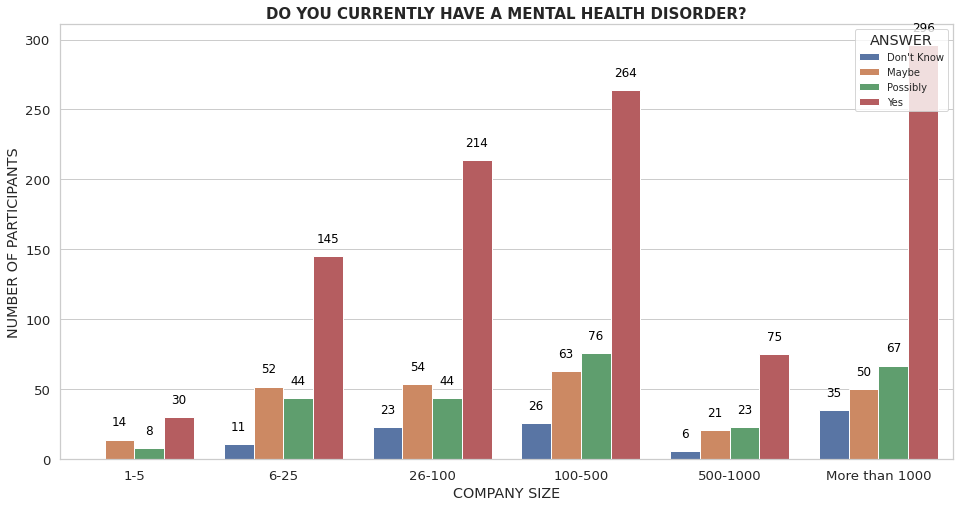

In [45]:
# Merge data for question 8 and question 33 using user_id as the key
q8_data = df[df["questionid"] == 8]
q8_data = q8_data[q8_data["Answer"] != "No"]
q8_data = q8_data.rename(columns={"Answer": "q8_ans"})
merged_data = pd.merge(q8_data, q33_data, on="UserID")

# Group the data by company size and mental health disorder, and count the number of participants for each group

aggregated_data = merged_data.groupby(["q8_ans", "q33_ans"]).size().reset_index(name="count")
aggregated_data = aggregated_data.fillna(0)
aggregated_data["count"] = aggregated_data["count"].astype(int)


# Create a bar plot to visualize the data
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x="q8_ans",
    y="count",
    hue="q33_ans",
    data=aggregated_data,
    order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
)
plt.xlabel("Company Size")
plt.xlabel("COMPANY SIZE")
plt.ylabel("NUMBER OF PARTICIPANTS")
plt.title("DO YOU CURRENTLY HAVE A MENTAL HEALTH DISORDER?", size=15, weight="bold")
plt.legend(title="ANSWER", loc="upper right", fontsize=10)
# Show the plot
bar_values_annotate(ax)
plt.show()

#### Findings:
It may be seen that part of people having mental issues correlates with company size - as companies size is increasing the part of mentally affected people is increasing as well. The reason behind that may be atmosphere at work, as in smaller companies people usualy bond better that leading to better work environment.

### Medical Leave For Mental Illness

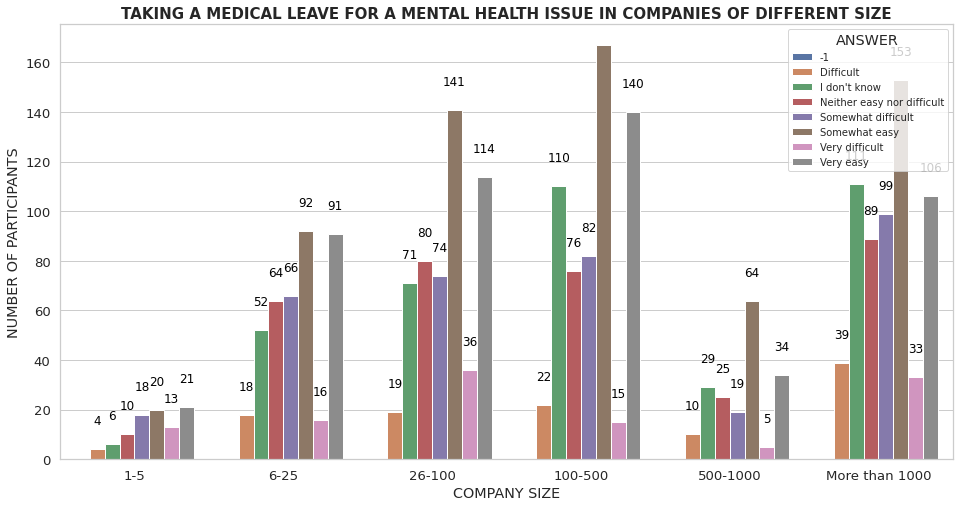

In [46]:
# Merge data for question 17 and question 18 using user_id as the key
q17_data = df[df["questionid"] == 17]
q17_data = q17_data[q17_data["Answer"] != "No"]
q17_data = q17_data.rename(columns={"Answer": "q17_ans"})
merged_data = pd.merge(q17_data, q8_data, on="UserID")


# Group the data by company size and mental health disorder, and count the number of participants for each group

aggregated_data = merged_data.groupby(["q17_ans", "q8_ans"]).size().reset_index(name="count")
aggregated_data = aggregated_data.fillna(0)
aggregated_data["count"] = aggregated_data["count"].astype(int)


# Create a bar plot to visualize the data
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(
    x="q8_ans",
    y="count",
    hue="q17_ans",
    data=aggregated_data,
    order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
)
plt.xlabel("Company Size")
plt.xlabel("COMPANY SIZE")
plt.ylabel("NUMBER OF PARTICIPANTS")
plt.title(
    "TAKING A MEDICAL LEAVE FOR A MENTAL HEALTH ISSUE IN COMPANIES OF DIFFERENT SIZE",
    size=15,
    weight="bold",
)
plt.legend(title="ANSWER", loc="upper right", fontsize=10)
# Show the plot
bar_values_annotate(ax)
plt.show()

#### Findings:
    It is seems that most of respondents are not facing huge difficulties if medical leave due to mental issues is needed, which indicates growing empathy and mental problems not being such a stigma anymore. However, there is still a room for companies to improve.
 

### Mental Problems Interfering Work

Text(0.5, 1.0, 'WHEN TREATED EFFICIENTLY')

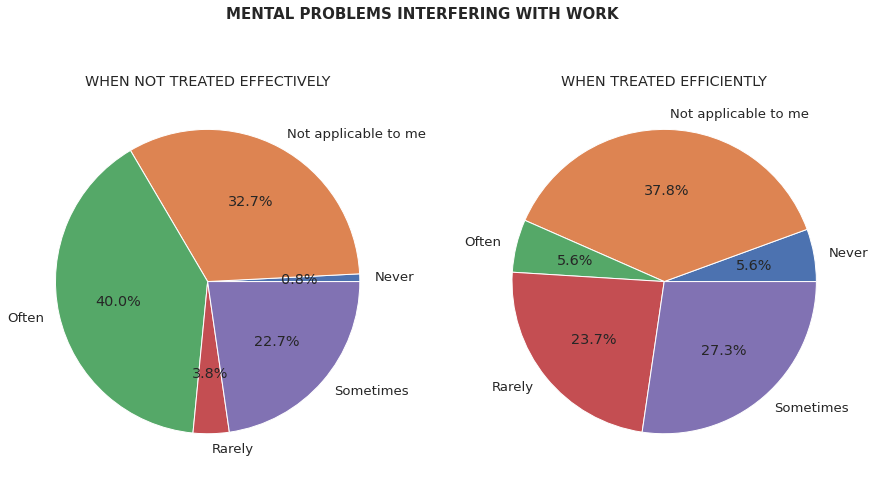

In [47]:
# Filter data for question 48 and remove rows where answer is "No"
q48_data = df[df["questionid"] == 48]
q48_data = q48_data[q48_data["Answer"] != "No"]
q48_data = q48_data.rename(columns={"Answer": "q48_ans"})
# Filter data for question 49 and remove rows where answer is "No"
q49_data = df[df["questionid"] == 49]
q49_data = q49_data[q49_data["Answer"] != "No"]
q49_data = q49_data.rename(columns={"Answer": "q49_ans"})
# Group the data by company size and mental health disorder, and count the number of participants for each group
q48_data_agg = q48_data.groupby("q48_ans").agg(count=("q48_ans", "count"))
q49_data_agg = q49_data.groupby("q49_ans").agg(count=("q49_ans", "count"))
# Create a Pie Chart to visualize the data
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("MENTAL PROBLEMS INTERFERING WITH WORK", fontsize=15, weight="bold")
axes[0].pie(q49_data_agg["count"], labels=q49_data_agg.index, autopct="%1.1f%%")
axes[1].pie(q48_data_agg["count"], labels=q48_data_agg.index, autopct="%1.1f%%")
axes[0].set_title("WHEN NOT TREATED EFFECTIVELY")
axes[1].set_title("WHEN TREATED EFFICIENTLY")

#### Findings:
Is is clearly seen that mental state has a huge impact on productivity, as a result employers should make efforts to improve mental well-being of workers, as it affects not only atmosphere, but also profits of the company

## Conclusion:

The mental health of tech industry employees is generally average, but there are signs of improvement.

To improve the situation, smaller companies should invest more in mental health benefits and larger companies should focus on creating a positive work environment.

Additionally, it's important to continue to reduce the stigma around mental health in the workplace by creating a safe and open space for discussion. 

Finally, more accurate data collection can help to better understand the mental health of tech industry employees.

### Improvements Of Analysis

The analysis of mental health in the tech industry may not be entirely accurate due to missing data.

Additionally, data from different years could not be compared due to inconsistent questions. 

To improve the analysis, further research should be conducted on productivity and other relevant topics.

More comprehensive data collection and analysis can lead to a better understanding of the mental health of tech industry employees.